## Problem: MRA Milestone 1
### An automobile parts manufacturing company has collected data of transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your magical data science skills to provide them with suitable insights about their data and their customers.


## Data Dictionary
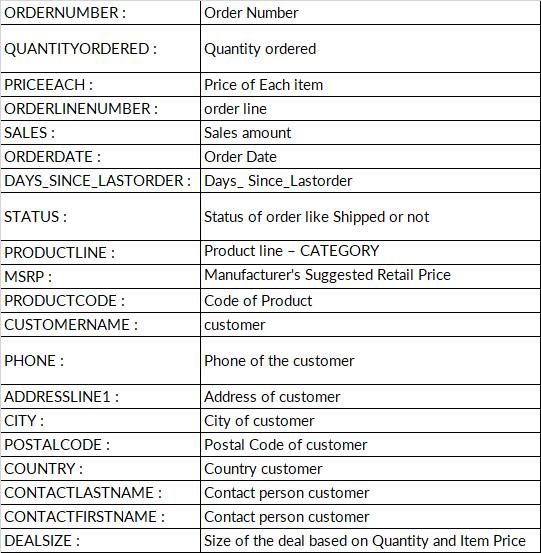




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from IPython.display import display
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Importing the Dataset

In [2]:
df=pd.read_excel('Sales_Data.xlsx')
df 

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
2746,10414,47,65.52,9,3079.44,2020-05-06,2772,On Hold,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,Yoshido,Juri,Medium


In [5]:
# Database dimension
print("Database dimensions :",df.shape)



Database dimensions : (2747, 20)


In [6]:
#Database size
print("Database size :",df.size)

Database size : 54940


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

#### Insights:
1. Total of 20 columns with 27 rows are present.
2. There are 5 Integer,2 float , 1 datetime  and 12 object columns.
3. There doesnt seem any null value in the dataset


## Checking missing values

In [8]:
missing_values=pd.DataFrame(df.isna().sum().reset_index())
missing_values.columns = ['Features','Missing count']
missing_values['% missing']= round(missing_values['Missing count'] /df.shape[0] * 100.00,2)
missing_values

,Features,Missing count,% missing
0,ORDERNUMBER,0,0.0
1,QUANTITYORDERED,0,0.0
2,PRICEEACH,0,0.0
3,ORDERLINENUMBER,0,0.0
4,SALES,0,0.0
5,ORDERDATE,0,0.0
6,DAYS_SINCE_LASTORDER,0,0.0
7,STATUS,0,0.0
8,PRODUCTLINE,0,0.0
9,MSRP,0,0.0


## Checking Statistical distribution 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


## Checking duplicates if any

In [10]:
df.duplicated().sum()

0

## Checking Skewness of the column


In [11]:
df.skew(axis=0)

ORDERNUMBER            -0.006995
QUANTITYORDERED         0.369286
PRICEEACH               0.697222
ORDERLINENUMBER         0.575327
SALES                   1.155940
DAYS_SINCE_LASTORDER   -0.002983
MSRP                    0.575646
dtype: float64

## EDA 

### Univariate analysis

In [12]:
def univariateAnalysis_numeric(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], color='orange',kde_kws={"color": "b", "lw": 2, "label": "KDE"});
    plt.show()
    
    print("Histogram of " + column)
    print("---------------------")
    plt.figure(figsize=(5,5))
    sns.histplot(df[x],color='lightgreen')
    plt.grid()
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [13]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

Description of ORDERNUMBER
----------------------------------------------------------------------------
count     2747.000000
mean     10259.761558
std         91.877521
min      10100.000000
25%      10181.000000
50%      10264.000000
75%      10334.500000
max      10425.000000
Name: ORDERNUMBER, dtype: float64 Distribution of ORDERNUMBER
----------------------------------------------------------------------------


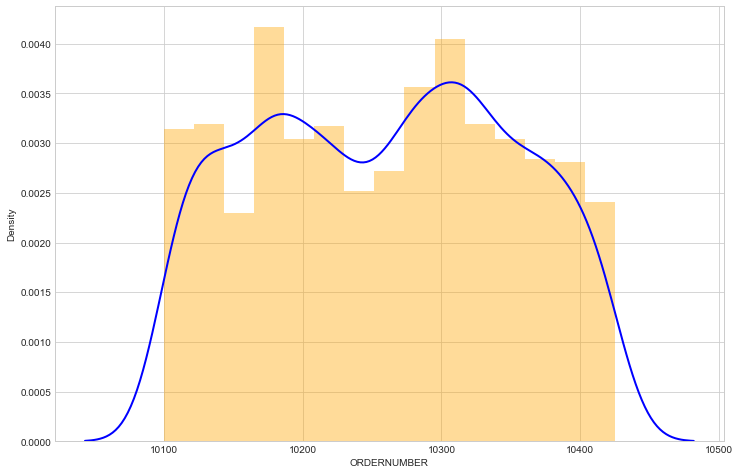

Histogram of ORDERNUMBER
---------------------


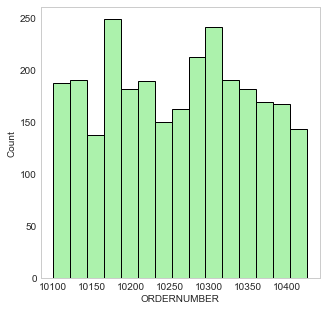

BoxPlot of ORDERNUMBER
----------------------------------------------------------------------------


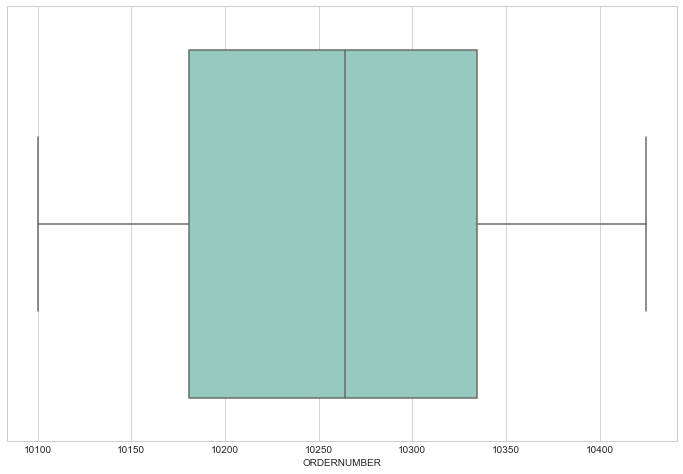

Description of QUANTITYORDERED
----------------------------------------------------------------------------
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64 Distribution of QUANTITYORDERED
----------------------------------------------------------------------------


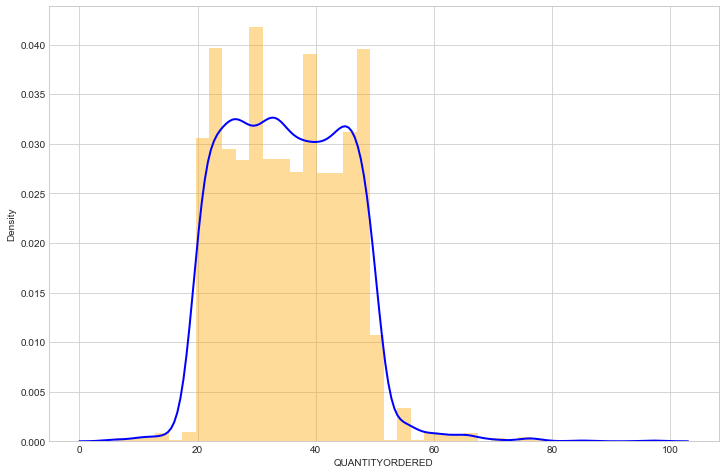

Histogram of QUANTITYORDERED
---------------------


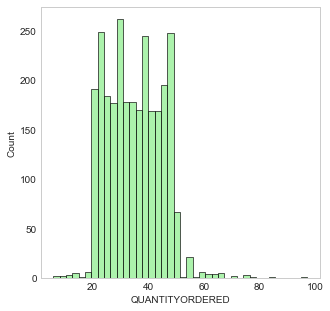

BoxPlot of QUANTITYORDERED
----------------------------------------------------------------------------


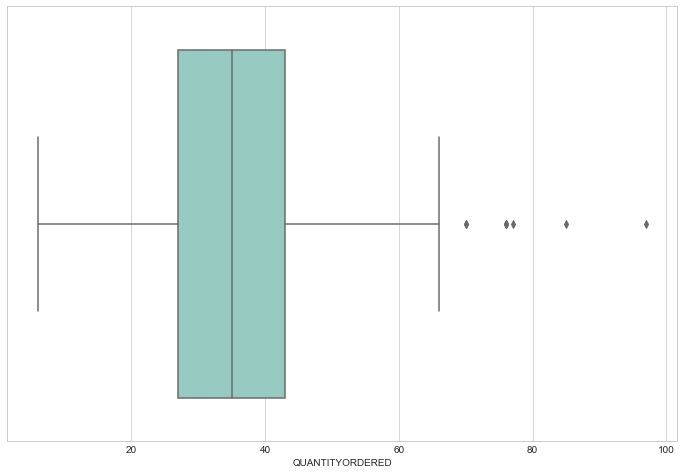

Description of PRICEEACH
----------------------------------------------------------------------------
count    2747.000000
mean      101.098951
std        42.042548
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64 Distribution of PRICEEACH
----------------------------------------------------------------------------


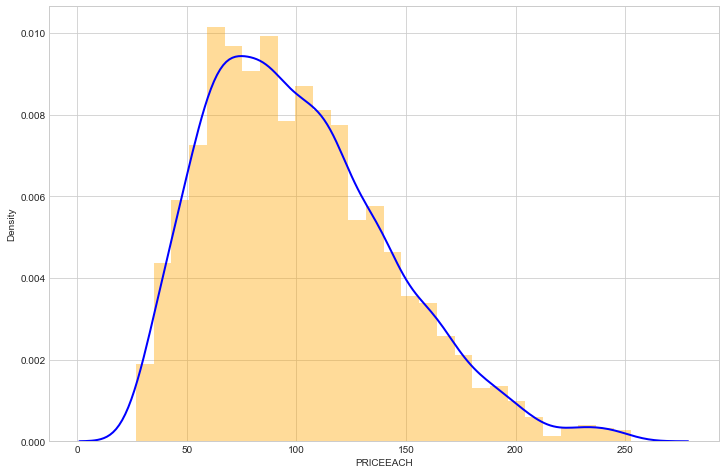

Histogram of PRICEEACH
---------------------


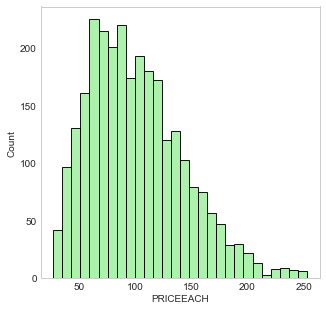

BoxPlot of PRICEEACH
----------------------------------------------------------------------------


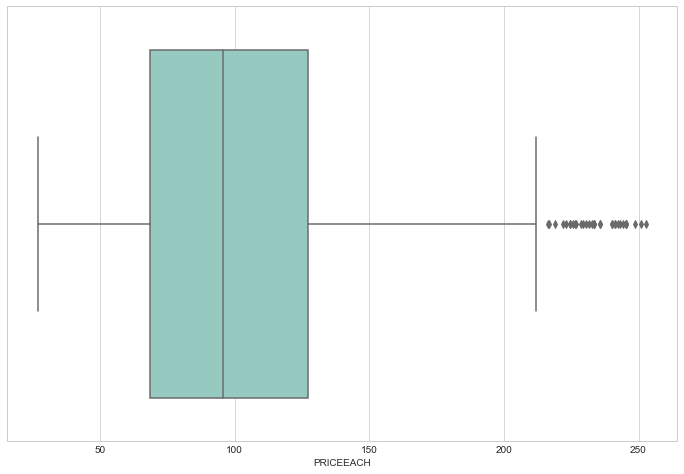

Description of ORDERLINENUMBER
----------------------------------------------------------------------------
count    2747.000000
mean        6.491081
std         4.230544
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: ORDERLINENUMBER, dtype: float64 Distribution of ORDERLINENUMBER
----------------------------------------------------------------------------


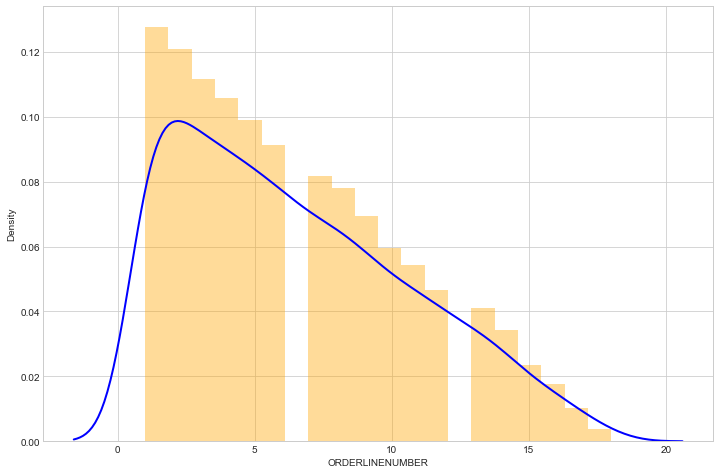

Histogram of ORDERLINENUMBER
---------------------


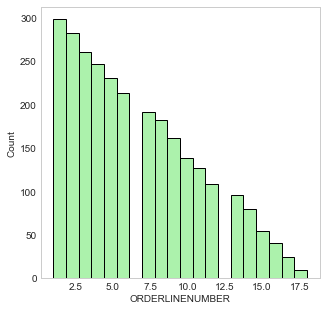

BoxPlot of ORDERLINENUMBER
----------------------------------------------------------------------------


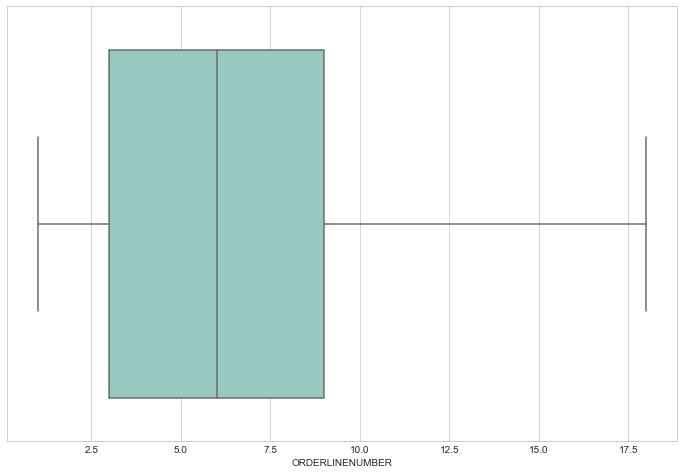

Description of SALES
----------------------------------------------------------------------------
count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64 Distribution of SALES
----------------------------------------------------------------------------


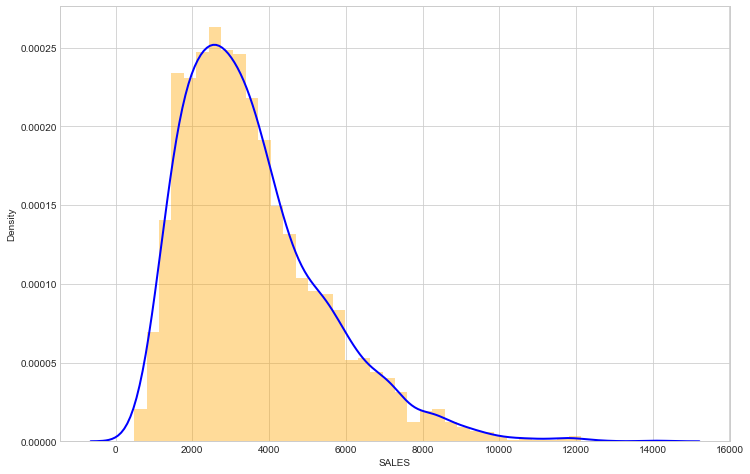

Histogram of SALES
---------------------


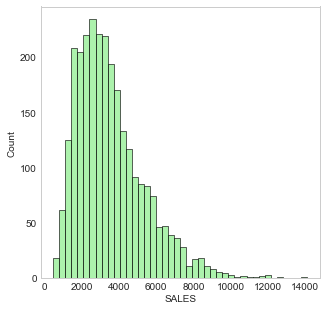

BoxPlot of SALES
----------------------------------------------------------------------------


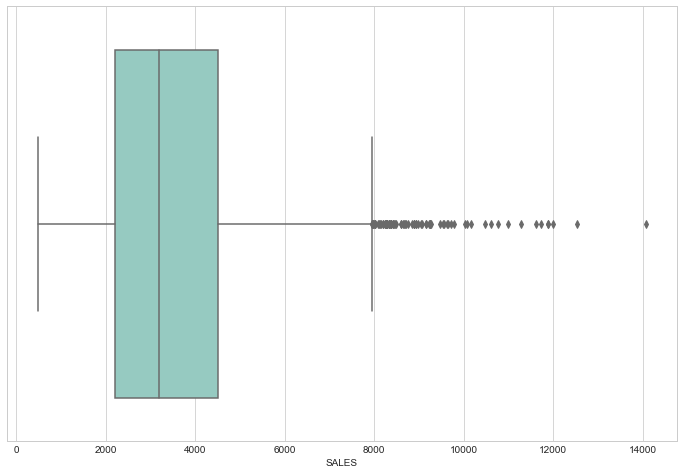

Description of DAYS_SINCE_LASTORDER
----------------------------------------------------------------------------
count    2747.000000
mean     1757.085912
std       819.280576
min        42.000000
25%      1077.000000
50%      1761.000000
75%      2436.500000
max      3562.000000
Name: DAYS_SINCE_LASTORDER, dtype: float64 Distribution of DAYS_SINCE_LASTORDER
----------------------------------------------------------------------------


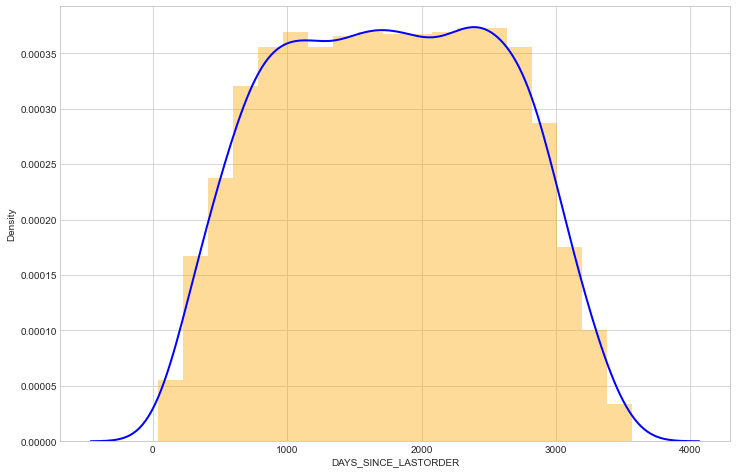

Histogram of DAYS_SINCE_LASTORDER
---------------------


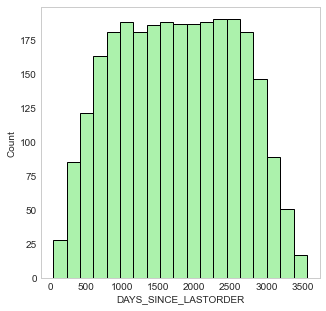

BoxPlot of DAYS_SINCE_LASTORDER
----------------------------------------------------------------------------


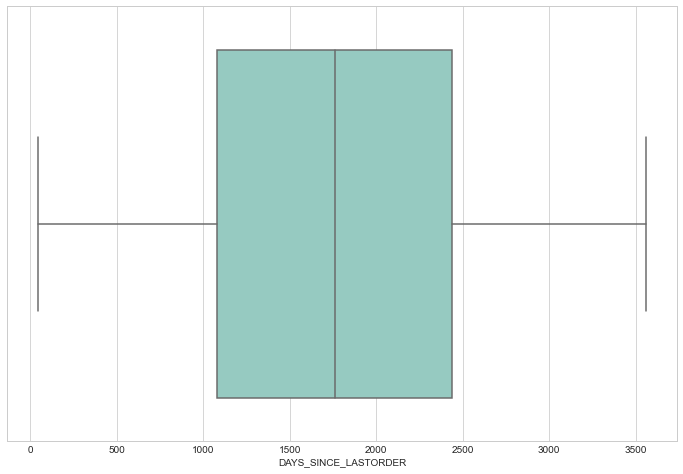

Description of MSRP
----------------------------------------------------------------------------
count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64 Distribution of MSRP
----------------------------------------------------------------------------


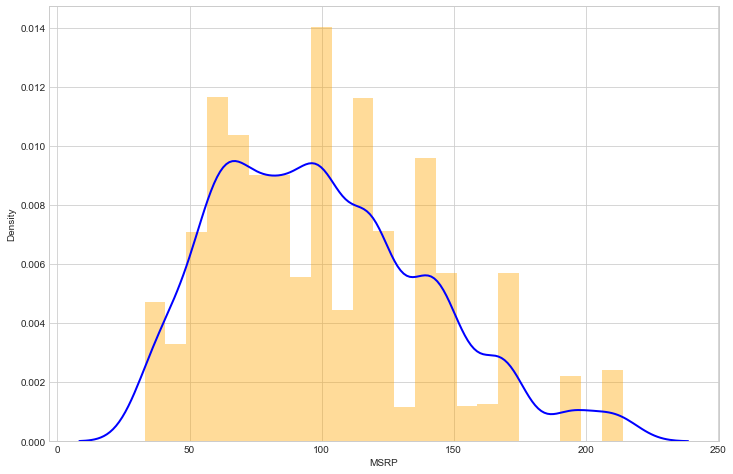

Histogram of MSRP
---------------------


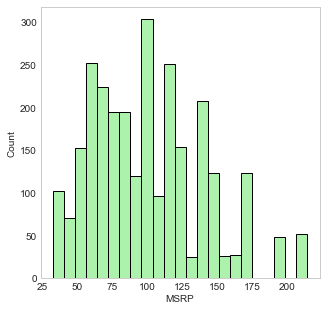

BoxPlot of MSRP
----------------------------------------------------------------------------


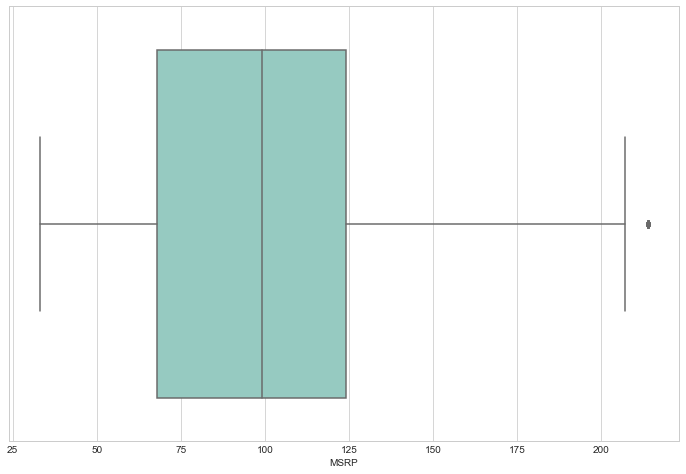

In [14]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x)

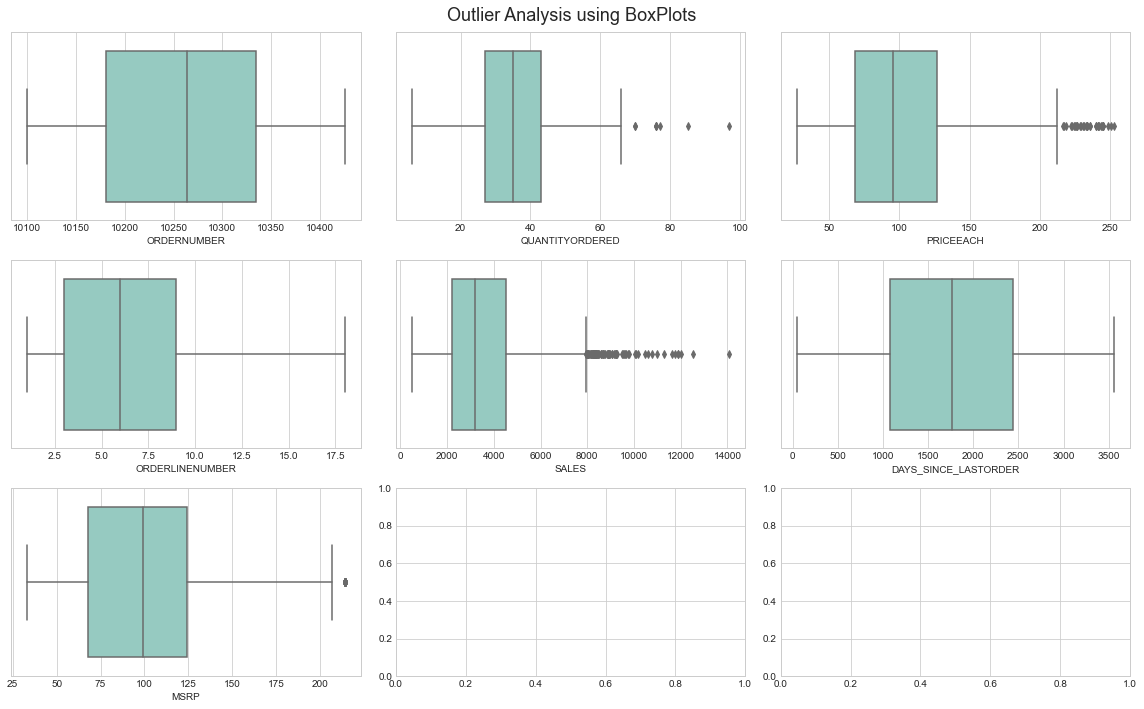

In [15]:
fig, ax = plt.subplots(3, 3, figsize = (16, 10))
ax = ax.flatten()

for i, c in enumerate(df_num):
    sns.boxplot(x = df_num[c], ax = ax[i])
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 18,fontweight=3)
fig.tight_layout()

### For categorical variables

Value counts of STATUS
..........................
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64 

..........................
Distribution of STATUS
..........................


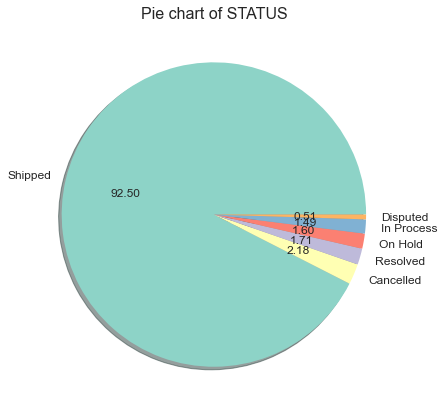

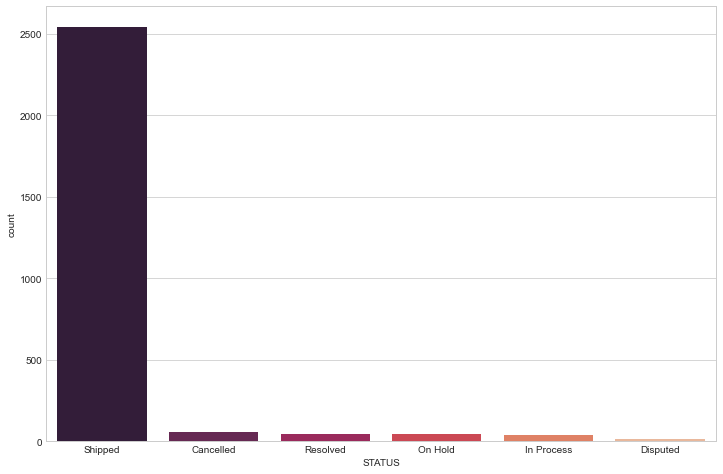

Value counts of PRODUCTLINE
..........................
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: PRODUCTLINE, dtype: int64 

..........................
Distribution of PRODUCTLINE
..........................


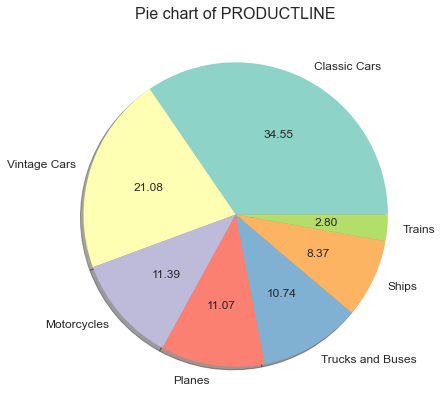

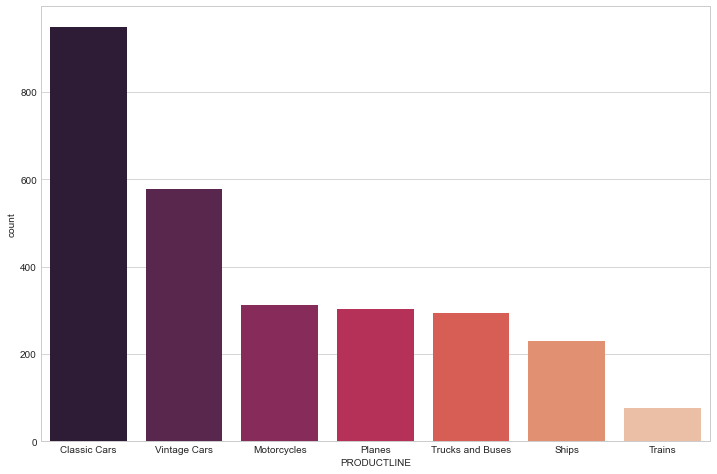

Value counts of PRODUCTCODE
..........................
S18_3232     51
S24_1444     28
S32_2509     28
S24_2840     28
S50_1392     28
S18_1984     27
S700_4002    27
S700_2824    27
S10_4962     27
S18_4600     27
S700_2466    27
S32_1268     27
S18_2432     27
S18_2238     27
S18_1129     27
S24_3949     27
S12_4473     27
S24_2300     27
S50_1514     26
S24_2972     26
S700_3505    26
S12_1666     26
S24_3420     26
S32_3207     26
S18_2319     26
S700_3962    26
S18_4668     26
S12_3891     26
S700_1691    26
S700_1138    26
S18_4522     26
S72_3212     26
S18_1097     26
S12_1108     26
S10_1949     26
S24_4048     26
S50_1341     26
S18_1662     26
S32_3522     26
S18_4027     26
S700_2610    26
S700_2047    26
S72_1253     26
S24_3856     26
S24_3151     25
S18_2870     25
S700_2834    25
S18_3259     25
S18_1589     25
S24_3371     25
S18_2949     25
S18_3136     25
S700_3167    25
S12_4675     25
S18_2795     25
S18_3140     25
S18_1889     25
S24_2011     25
S18_3856     25
S

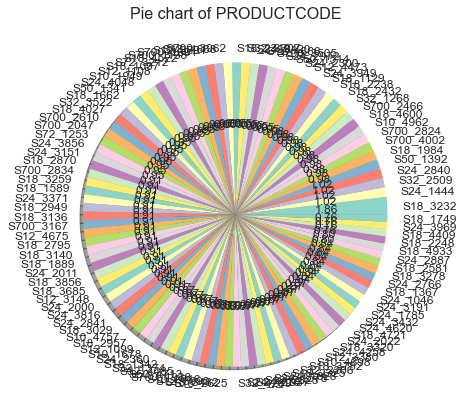

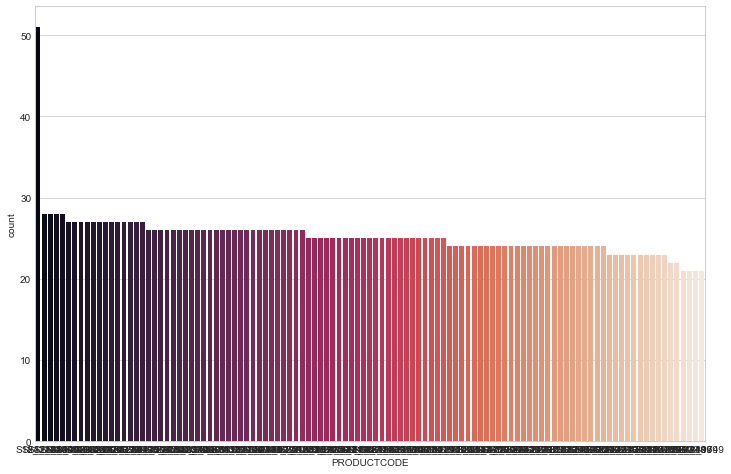

Value counts of CUSTOMERNAME
..........................
Euro Shopping Channel                 259
Mini Gifts Distributors Ltd.          180
Australian Collectors, Co.             55
La Rochelle Gifts                      53
AV Stores, Co.                         51
Land of Toys Inc.                      49
Muscle Machine Inc                     48
Rovelli Gifts                          48
Anna's Decorations, Ltd                46
Souveniers And Things Co.              46
Dragon Souveniers, Ltd.                43
Reims Collectables                     41
Saveley & Henriot, Co.                 41
Salzburg Collectables                  40
The Sharp Gifts Warehouse              40
L'ordine Souveniers                    39
Scandinavian Gift Ideas                38
Danish Wholesale Imports               36
Handji Gifts& Co                       36
Mini Creations Ltd.                    35
Online Diecast Creations Co.           34
Technics Stores Inc.                   34
Oulu Toy Supplies, I

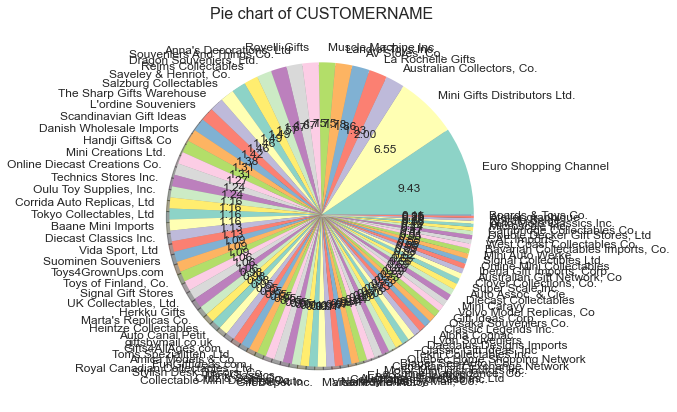

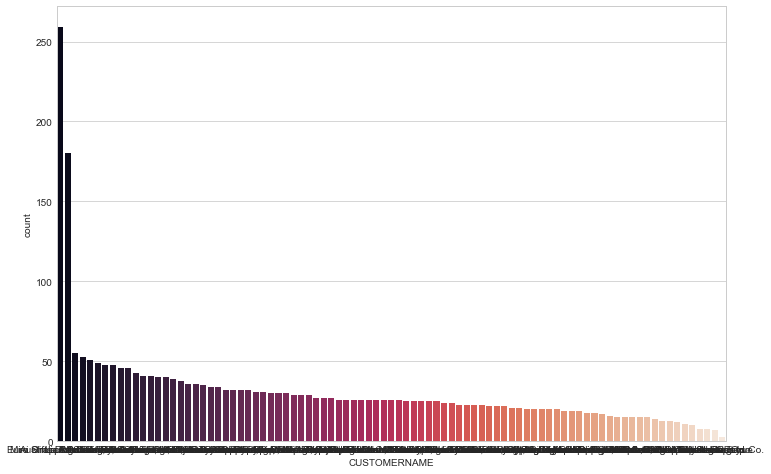

Value counts of PHONE
..........................
(91) 555 94 44       259
4155551450           180
03 9520 4555          55
40.67.8555            53
6175558555            51
(171) 555-1555        51
2125557818            49
035-640555            48
2125557413            48
+61 2 9495 8555       46
02 9936 8555          46
+65 221 7555          43
78.32.5555            41
26.47.1555            41
4085553659            40
6562-9555             40
0522-556555           39
0695-34 6555          38
+65 224 1555          36
31 12 3555            36
5085559555            35
6505556809            34
6035558647            34
(91) 555 22 82        32
981-443655            32
+81 3 3584 0555       32
07-98 9555            32
2155551555            31
0897-034555           31
+358 9 8045 555       30
6265557265            30
90-224 8555           30
(171) 555-2282        29
7025551838            29
+47 2267 3215         29
(1) 47.55.6555        27
86 21 3555            27
9145554562            26
0

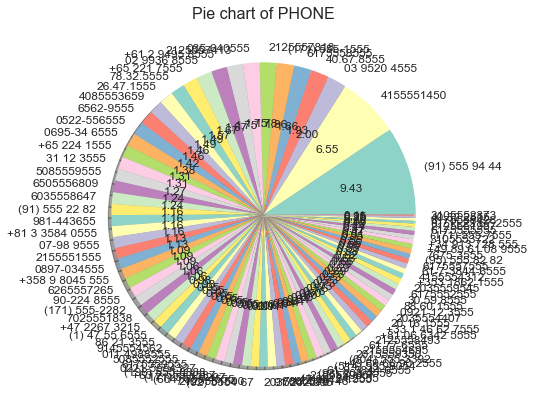

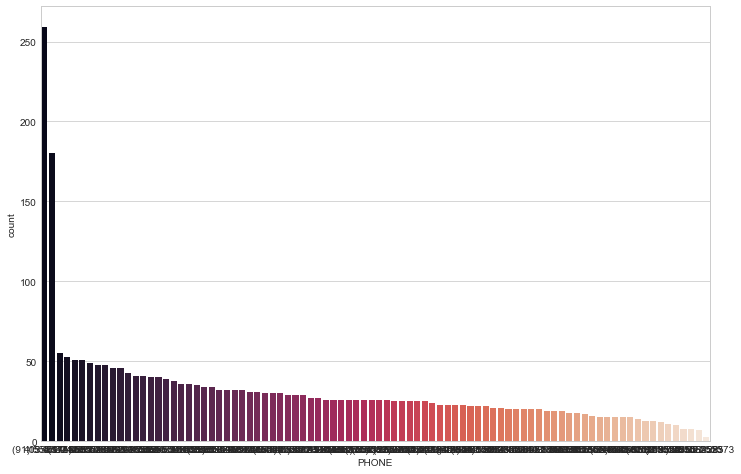

Value counts of ADDRESSLINE1
..........................
C/ Moralzarzal, 86                            259
5677 Strong St.                               180
636 St Kilda Road                              55
67, rue des Cinquante Otages                   53
Fauntleroy Circus                              51
897 Long Airport Avenue                        49
4092 Furth Circle                              48
Via Ludovico il Moro 22                        48
Monitor Money Building, 815 Pacific Hwy        46
201 Miller Street                              46
Bronz Sok., Bronz Apt. 3/6 Tesvikiye           43
2, rue du Commerce                             41
59 rue de l'Abbaye                             41
3086 Ingle Ln.                                 40
Geislweg 14                                    40
Strada Provinciale 124                         39
?kergatan 24                                   38
Village Close - 106 Linden Road Sandown        36
Vinb'ltet 34                                

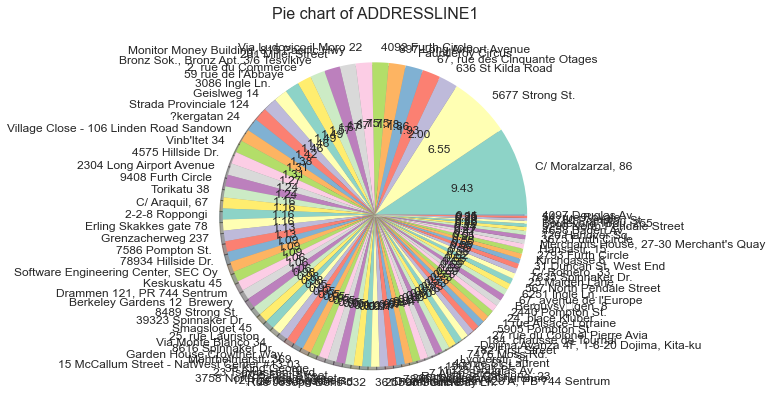

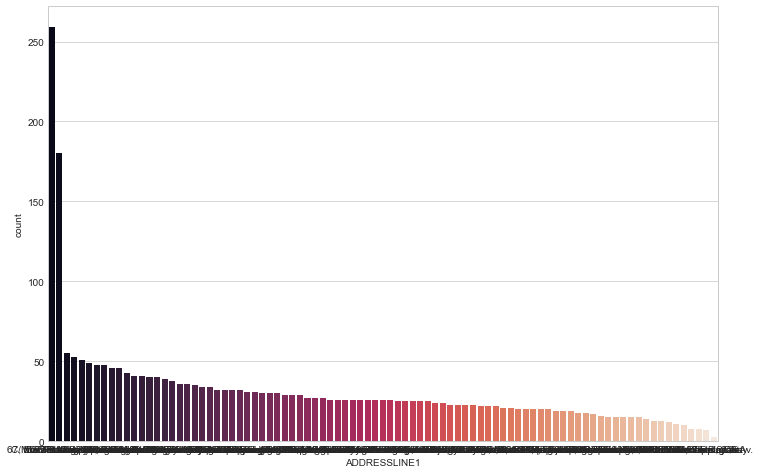

Value counts of CITY
..........................
Madrid            304
San Rafael        180
NYC               152
Singapore          79
Paris              70
New Bedford        61
Nantes             60
Melbourne          55
Manchester         51
Bergamo            48
Brickhaven         47
Chatswood          46
North Sydney       46
Boston             44
Philadelphia       44
Lyon               41
Reims              41
San Jose           40
Salzburg           40
Reggio Emilia      39
Cambridge          38
London             38
Boras              38
Kobenhavn          36
Burlingame         34
Nashua             34
Minato-ku          32
Stavern            32
Oulu               32
Allentown          31
Gensve             31
Helsinki           30
Espoo              30
Pasadena           30
Liverpool          29
Las Vegas          29
Bergen             29
Aaarhus            27
Torino             26
Tsawassen          26
Koln               26
Cowes              26
White Plains       26
Makati

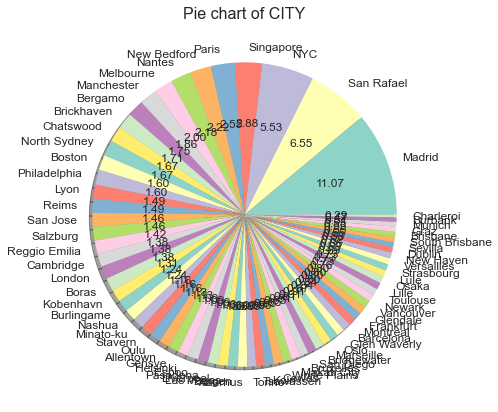

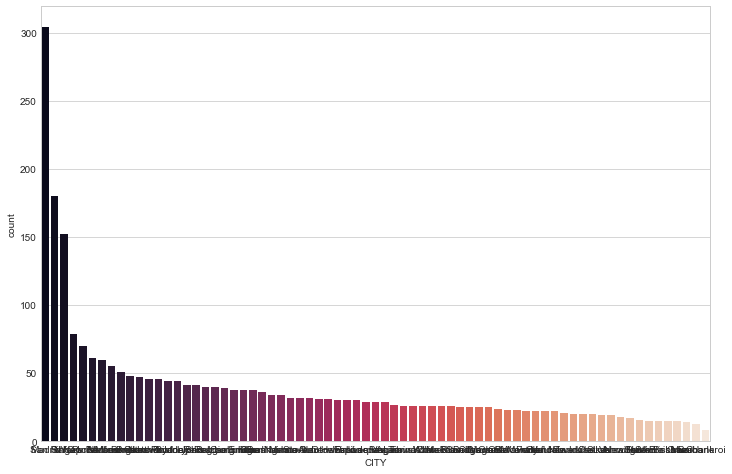

Value counts of POSTALCODE
..........................
28034        259
97562        205
10022        152
94217         89
50553         61
44000         60
3004          55
EC2 5NT       51
24100         48
58339         47
2060          46
2067          46
28023         45
71270         44
51003         44
79903         43
69004         41
51100         41
5020          40
42100         39
S-844 67      38
51247         38
69045         36
1734          36
94019         34
62005         34
106-0032      32
4110          32
90110         32
1203          31
70267         31
FIN-02271     30
21240         30
90003         30
N 5804        29
83030         29
WX1 6LT       29
8200          27
75016         27
50739         26
10100         26
PO31 7PJ      26
1227 MM       26
WX3 6FW       26
T2F 8M4       26
24067         26
B-1180        25
91217         25
13008         25
N 0106        24
8022          23
75012         23
3150          23
V3F 2K1       22
60528         22
H1J 1C3    

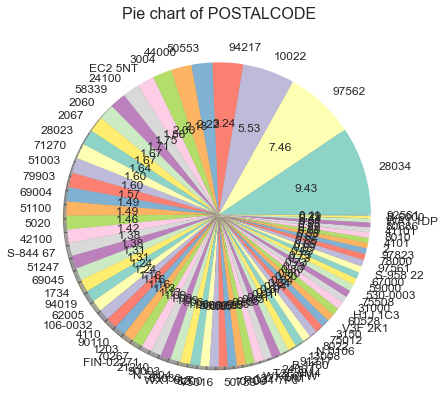

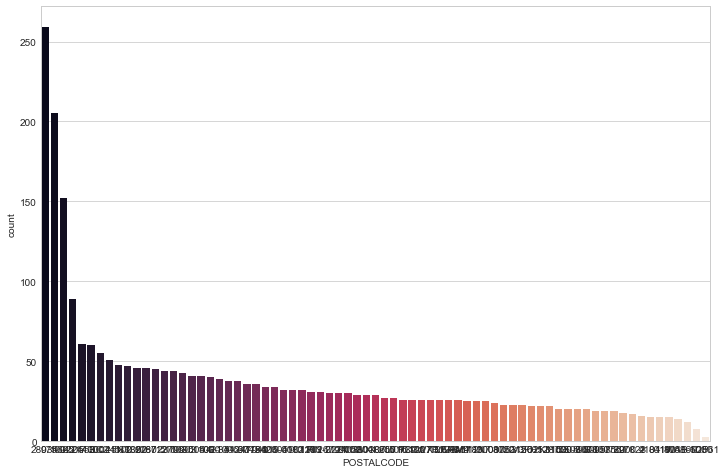

Value counts of COUNTRY
..........................
USA            928
Spain          342
France         314
Australia      185
UK             144
Italy          113
Finland         92
Norway          85
Singapore       79
Canada          70
Denmark         63
Germany         62
Sweden          57
Austria         55
Japan           52
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: COUNTRY, dtype: int64 

..........................
Distribution of COUNTRY
..........................


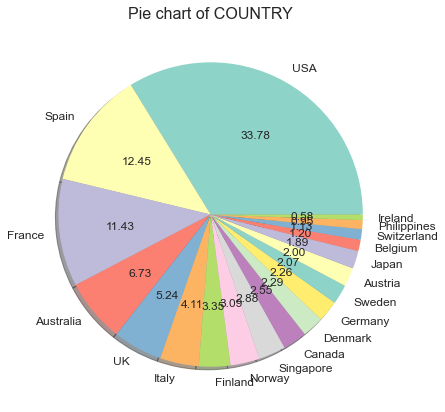

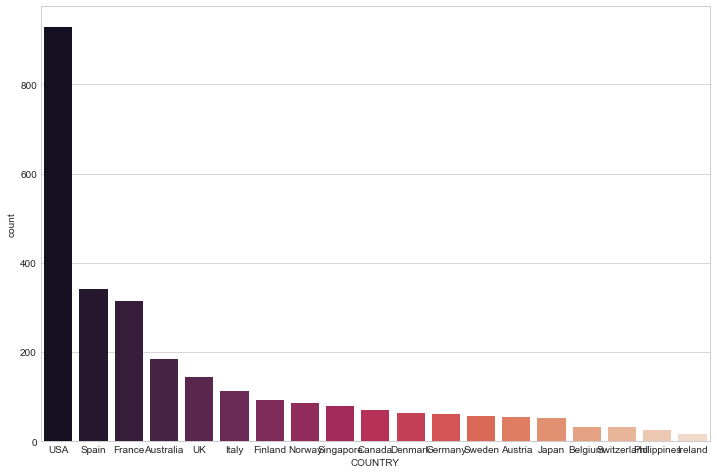

Value counts of CONTACTLASTNAME
..........................
Freyre         259
Nelson         204
Young          115
Frick           91
Yu              80
Hernandez       70
Ferguson        55
King            54
Labrune         53
Ashworth        51
Rovelli         48
Brown           47
Huxley          46
O'Hara          46
Natividad       43
Saveley         41
Henriot         41
Pipps           40
Moroni          39
Larsson         38
Thompson        38
Petersen        36
Victorino       36
Tam             35
Hirano          34
Sommer          32
Shimamura       32
Koskitalo       32
Bergulfsen      32
Holz            31
Suominen        30
Karttunen       30
Devon           29
Oeztan          29
Ibsen           27
Perrier         27
Lincoln         26
Yoshido         26
Accorti         26
Cruz            26
Benitez         26
Bennett         26
Pfalzheim       26
Dewey           25
Lebihan         25
Klaeboe         24
Connery         23
Taylor          23
Saavedra        23
Bertrand  

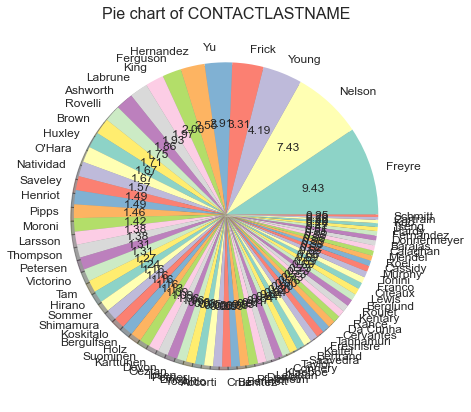

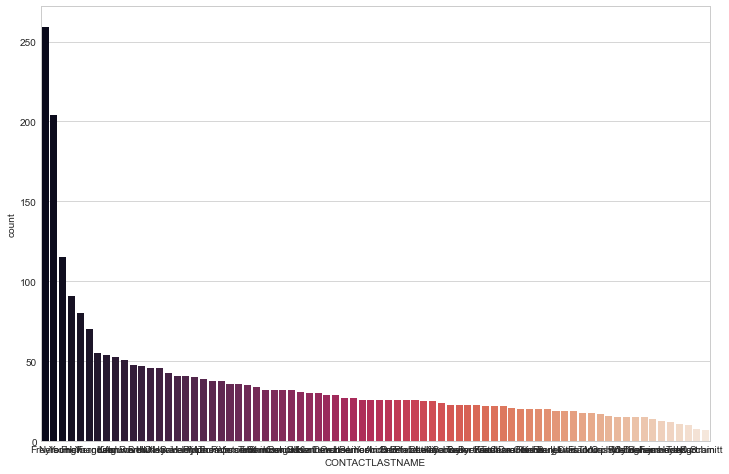

Value counts of CONTACTFIRSTNAME
..........................
Diego         259
Valarie       257
Sue            84
Michael        70
Juri           60
Maria          58
Elizabeth      55
Peter          55
Julie          55
Janine         53
Victoria       51
Kwai           49
Giovanni       48
Jeff           48
Anna           46
Adrian         46
Eric           43
Kyung          42
Paul           41
Mary           41
Georg          40
Steve          39
Maurizio       39
Daniel         38
Roland         37
Wendy          36
Jytte          36
Wing C         35
Akiko          32
Pirkko         32
Mart¡n         32
Jonas          32
Matti          30
Kalle          30
Veysel         29
Leslie         28
Palle          27
Marta          27
Dominique      27
Henriette      26
Helen          26
Ann            26
Paolo          26
Violeta        26
Arnold         26
Catherine      25
Laurence       25
Allen          24
Jan            24
Eduardo        23
Rosa           23
Sean           23
Mari

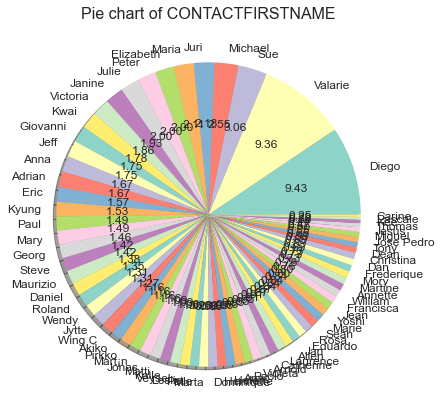

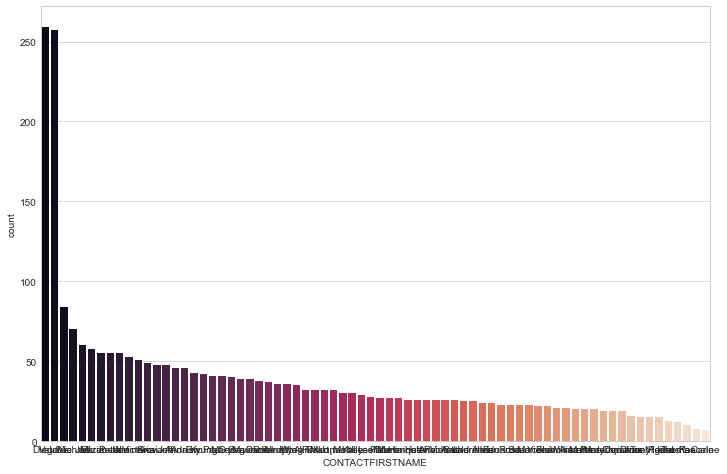

Value counts of DEALSIZE
..........................
Medium    1349
Small     1246
Large      152
Name: DEALSIZE, dtype: int64 

..........................
Distribution of DEALSIZE
..........................


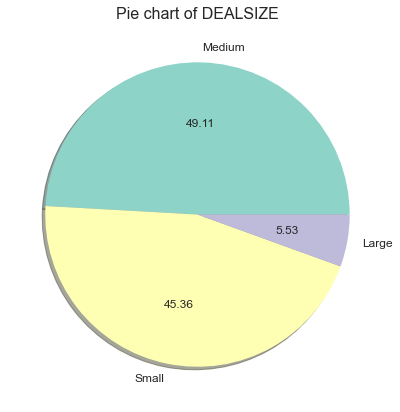

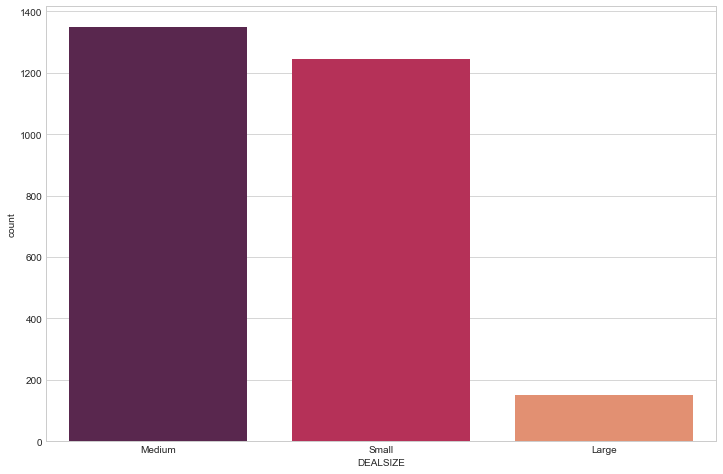

In [16]:
Categorical=[]
for x in list(df.columns):
    if df[x].dtypes==object:
        Categorical.append(x)
def univariate_Categorical(column):
    print('Value counts of ' + column)
    print('..........................')
    print(df[x].value_counts(),end=' ')
    print('\n')
    
    plt.figure(figsize=(12,7));
    plt.title('Pie chart of '+ column )
    print('..........................')
    plt.pie(x=df[x].value_counts(), autopct='%0.2f',textprops={'fontsize': 12}, labels=df[x].value_counts().index, shadow=True)

    plt.figure()
    print('Distribution of '+ column)
    print('..........................')
    sns.countplot(df[x],palette='rocket',order=df[x].value_counts().index)
    plt.show()

       
for x in Categorical:
    univariate_Categorical(x)
    plt.tight_layout

In [17]:
df['PRODUCTLINE'].value_counts()

Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: PRODUCTLINE, dtype: int64

In [18]:
df['PRODUCTCODE'].value_counts()

S18_3232     51
S24_1444     28
S32_2509     28
S24_2840     28
S50_1392     28
S18_1984     27
S700_4002    27
S700_2824    27
S10_4962     27
S18_4600     27
S700_2466    27
S32_1268     27
S18_2432     27
S18_2238     27
S18_1129     27
S24_3949     27
S12_4473     27
S24_2300     27
S50_1514     26
S24_2972     26
S700_3505    26
S12_1666     26
S24_3420     26
S32_3207     26
S18_2319     26
S700_3962    26
S18_4668     26
S12_3891     26
S700_1691    26
S700_1138    26
S18_4522     26
S72_3212     26
S18_1097     26
S12_1108     26
S10_1949     26
S24_4048     26
S50_1341     26
S18_1662     26
S32_3522     26
S18_4027     26
S700_2610    26
S700_2047    26
S72_1253     26
S24_3856     26
S24_3151     25
S18_2870     25
S700_2834    25
S18_3259     25
S18_1589     25
S24_3371     25
S18_2949     25
S18_3136     25
S700_3167    25
S12_4675     25
S18_2795     25
S18_3140     25
S18_1889     25
S24_2011     25
S18_3856     25
S18_3685     25
S12_3148     25
S24_2000     25
S24_3816

## Importing the customer-wise RFM file 

In [19]:
mod_data=pd.read_csv('RFM for project.csv')

In [21]:
RFM=mod_data[['CUSTOMERNAME','ORDERNUMBER','date wsie Recency','Monetary values','Frequency','Monetary' ,'Recency' ,'Concatenate']]
RFM.head()

,CUSTOMERNAME,ORDERNUMBER,date wsie Recency,Monetary values,Frequency,Monetary,Recency,Concatenate
0,"AV Stores, Co.",51,196,157807.81,4,4,2,442
1,Alpha Cognac,20,64,70488.44,1,1,4,114
2,Amica Models & Co.,26,265,94117.26,2,3,1,231
3,"Anna's Decorations, Ltd",46,83,153996.13,4,4,3,443
4,Atelier graphique,7,188,24179.96,1,1,2,112


In [22]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUSTOMERNAME       89 non-null     object 
 1   ORDERNUMBER        89 non-null     int64  
 2   date wsie Recency  89 non-null     int64  
 3   Monetary values    89 non-null     float64
 4   Frequency          89 non-null     int64  
 5   Monetary           89 non-null     int64  
 6   Recency            89 non-null     int64  
 7   Concatenate        89 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 5.7+ KB


## EDA for RFM 

In [23]:
RFM['date wsie Recency'].describe()

count     89.000000
mean     179.606742
std      128.893862
min        0.000000
25%       75.000000
50%      184.000000
75%      230.000000
max      495.000000
Name: date wsie Recency, dtype: float64

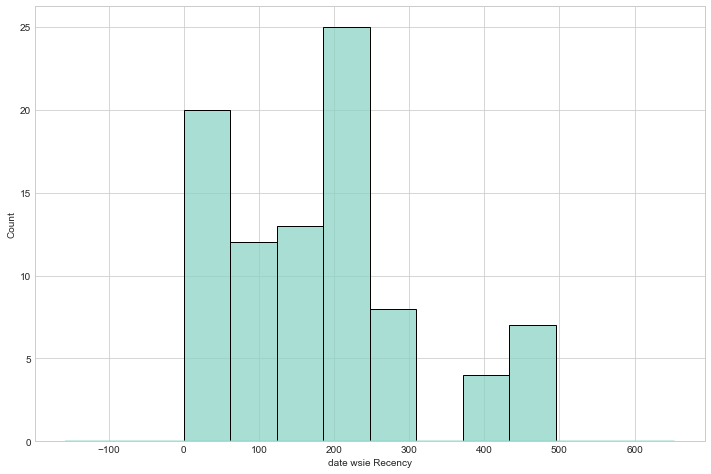

In [52]:
#Recency distribution plot
import seaborn as sns
x = RFM['date wsie Recency']

ax = sns.histplot(x)
ax = sns.distplot(x)

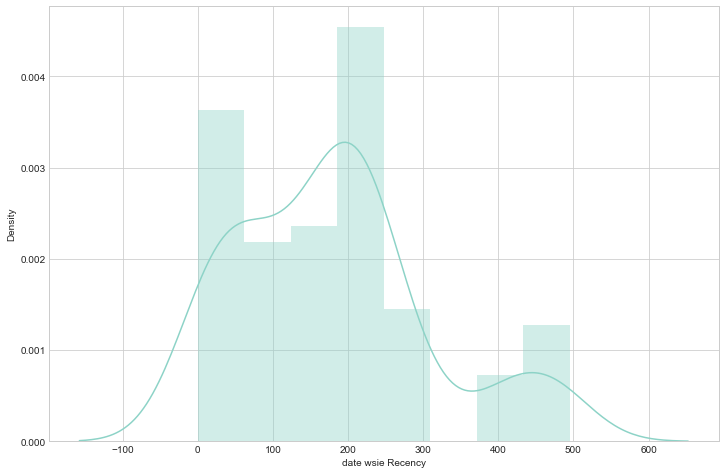

In [53]:
#Recency distribution plot
import seaborn as sns
x =RFM['date wsie Recency']

ax = sns.distplot(x)

In [54]:
RFM['Monetary values'].describe()

count        89.000000
mean     109665.412472
std      111837.420467
min        9129.350000
25%       70488.440000
50%       87489.230000
75%      120562.740000
max      912294.110000
Name: Monetary values, dtype: float64

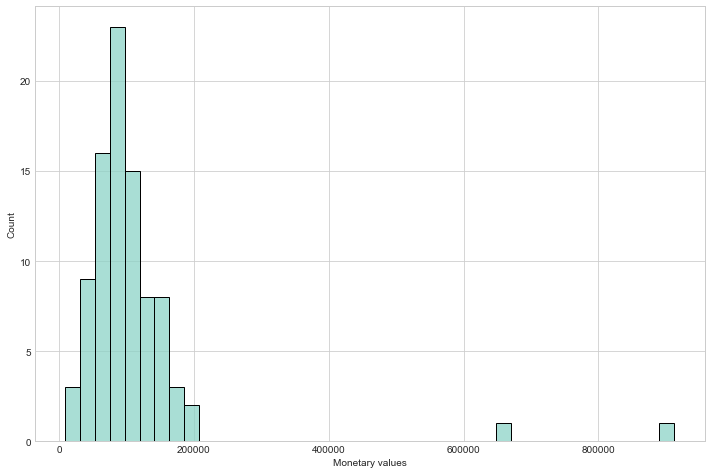

In [55]:
#Recency distribution plot
import seaborn as sns
x = RFM['Monetary values']

ax = sns.histplot(x)

In [56]:
RFM['ORDERNUMBER'].describe()

count     89.000000
mean      30.865169
std       31.370292
min        3.000000
25%       20.000000
50%       26.000000
75%       32.000000
max      259.000000
Name: ORDERNUMBER, dtype: float64

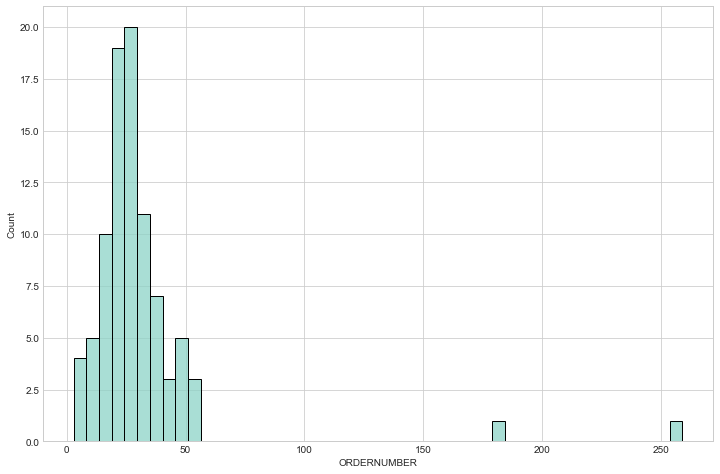

In [57]:
#Recency distribution plot
import seaborn as sns
x = RFM['ORDERNUMBER']

ax = sns.histplot(x)

In [58]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFM['RFMGroup'] = RFM.Recency.map(str) + RFM.Frequency.map(str) + RFM.Monetary.map(str)
RFM.head()

,CUSTOMERNAME,ORDERNUMBER,date wsie Recency,Monetary values,Frequency,Monetary,Recency,Concatenate,RFMGroup
0,"AV Stores, Co.",51,196,157807.81,4,4,2,442,244
1,Alpha Cognac,20,64,70488.44,1,1,4,114,411
2,Amica Models & Co.,26,265,94117.26,2,3,1,231,123
3,"Anna's Decorations, Ltd",46,83,153996.13,4,4,3,443,344
4,Atelier graphique,7,188,24179.96,1,1,2,112,211


In [60]:
RFM['Concatenate'].describe()

count     89.000000
mean     263.303371
std      126.926285
min      111.000000
25%      121.000000
50%      231.000000
75%      344.000000
max      444.000000
Name: Concatenate, dtype: float64

In [61]:

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFM['RFMScore'] = RFM[['Recency', 'Frequency', 'Monetary']].sum(axis = 1)
RFM.RFMScore.head()

0    10
1     6
2     6
3    11
4     4
Name: RFMScore, dtype: int64

In [63]:
RFM['RFMScore'].describe()

count    89.000000
mean      7.359551
std       2.889036
min       3.000000
25%       5.000000
50%       7.000000
75%      10.000000
max      12.000000
Name: RFMScore, dtype: float64

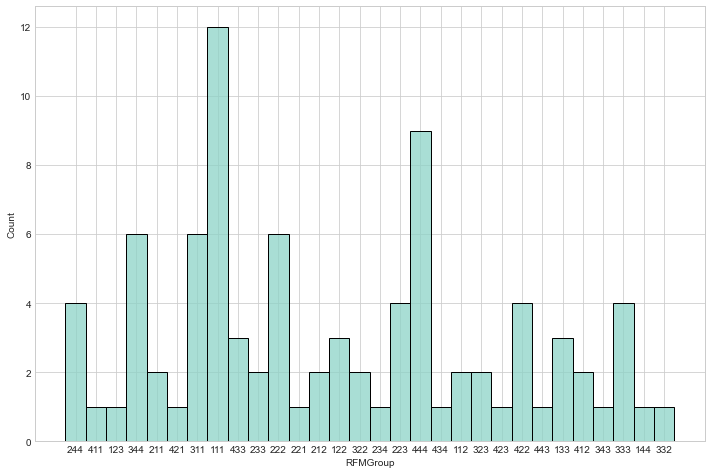

In [64]:


#Recency distribution plot

x = RFM['RFMGroup']
ax = sns.histplot(x)

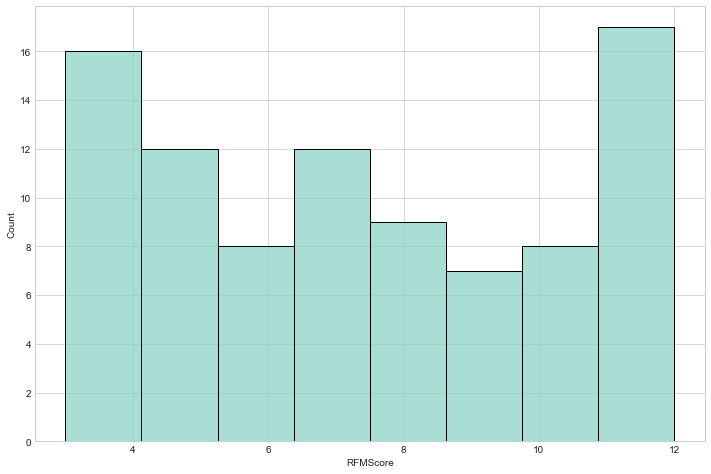

In [65]:

x = RFM['RFMScore']
ax = sns.histplot(x)

In [66]:
RFM['RFMScore'].value_counts()

3     12
5     12
7     12
8      9
12     9
6      8
10     8
11     8
9      7
4      4
Name: RFMScore, dtype: int64

In [67]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Lost','About to Churn','Loyal','Best' ]
Score_cuts = pd.qcut(RFM.RFMScore, q = 4, labels = Loyalty_Level)
RFM['RFM_Loyalty_Level'] = Score_cuts.values
RFM.reset_index().head()

,index,CUSTOMERNAME,ORDERNUMBER,date wsie Recency,Monetary values,Frequency,Monetary,Recency,Concatenate,RFMGroup,RFMScore,RFM_Loyalty_Level
0,0,"AV Stores, Co.",51,196,157807.81,4,4,2,442,244,10,Loyal
1,1,Alpha Cognac,20,64,70488.44,1,1,4,114,411,6,About to Churn
2,2,Amica Models & Co.,26,265,94117.26,2,3,1,231,123,6,About to Churn
3,3,"Anna's Decorations, Ltd",46,83,153996.13,4,4,3,443,344,11,Best
4,4,Atelier graphique,7,188,24179.96,1,1,2,112,211,4,Lost


In [71]:
RFM

,CUSTOMERNAME,ORDERNUMBER,date wsie Recency,Monetary values,Frequency,Monetary,Recency,Concatenate,RFMGroup,RFMScore,RFM_Loyalty_Level
0,"AV Stores, Co.",51,196,157807.81,4,4,2,442,244,10,Loyal
1,Alpha Cognac,20,64,70488.44,1,1,4,114,411,6,About to Churn
2,Amica Models & Co.,26,265,94117.26,2,3,1,231,123,6,About to Churn
3,"Anna's Decorations, Ltd",46,83,153996.13,4,4,3,443,344,11,Best
4,Atelier graphique,7,188,24179.96,1,1,2,112,211,4,Lost
5,"Australian Collectables, Ltd",23,22,64591.46,2,1,4,214,421,7,About to Churn
6,"Australian Collectors, Co.",55,184,200995.41,4,4,3,443,344,11,Best
7,"Australian Gift Network, Co",15,119,59469.12,1,1,3,113,311,5,Lost
8,Auto Assoc. & Cie.,18,233,64834.32,1,1,1,111,111,3,Lost
9,Auto Canal Petit,27,54,93170.66,3,3,4,334,433,10,Loyal


In [68]:
#Validate the data for RFMGroup = 111
RFM[RFM['RFMGroup']=='111'].sort_values('Monetary values', ascending=False).reset_index().head(10)

,index,CUSTOMERNAME,ORDERNUMBER,date wsie Recency,Monetary values,Frequency,Monetary,Recency,Concatenate,RFMGroup,RFMScore,RFM_Loyalty_Level
0,25,Daedalus Designs Imports,20,465,69052.41,1,1,1,111,111,3,Lost
1,59,Osaka Souveniers Co.,20,414,67605.07,1,1,1,111,111,3,Lost
2,8,Auto Assoc. & Cie.,18,233,64834.32,1,1,1,111,111,3,Lost
3,20,"Clover Collections, Co.",16,258,57756.43,1,1,1,111,111,3,Lost
4,58,Online Mini Collectables,15,264,57197.96,1,1,1,111,111,3,Lost
5,40,"Iberia Gift Imports, Corp.",15,238,54723.62,1,1,1,111,111,3,Lost
6,70,Signal Collectibles Ltd.,15,476,50218.51,1,1,1,111,111,3,Lost
7,15,CAF Imports,13,439,49642.05,1,1,1,111,111,3,Lost
8,87,West Coast Collectables Co.,13,488,46084.64,1,1,1,111,111,3,Lost
9,16,Cambridge Collectables Co.,11,389,36163.62,1,1,1,111,111,3,Lost


In [69]:
#Validate the data for RFMGroup = 111
RFM[RFM['RFMGroup']=='444'].sort_values('Monetary values', ascending=False).reset_index().head(10)

,index,CUSTOMERNAME,ORDERNUMBER,date wsie Recency,Monetary values,Frequency,Monetary,Recency,Concatenate,RFMGroup,RFMScore,RFM_Loyalty_Level
0,32,Euro Shopping Channel,259,0,912294.11,4,4,4,444,444,12,Best
1,53,Mini Gifts Distributors Ltd.,180,2,654858.06,4,4,4,444,444,12,Best
2,43,La Rochelle Gifts,53,0,180124.90,4,4,4,444,444,12,Best
3,78,The Sharp Gifts Warehouse,40,39,160010.27,4,4,4,444,444,12,Best
4,72,Souveniers And Things Co.,46,2,151570.98,4,4,4,444,444,12,Best
5,67,Salzburg Collectables,40,14,149798.63,4,4,4,444,444,12,Best
6,26,Danish Wholesale Imports,36,46,145041.60,4,4,4,444,444,12,Best
7,41,L'ordine Souveniers,39,21,142601.33,4,4,4,444,444,12,Best
8,63,Reims Collectables,41,62,135042.94,4,4,4,444,444,12,Best


In [70]:
RFM['RFMGroup'].value_counts()


111    12
444     9
344     6
222     6
311     6
333     4
223     4
244     4
422     4
133     3
122     3
433     3
412     2
322     2
233     2
212     2
323     2
112     2
211     2
443     1
434     1
123     1
332     1
234     1
343     1
421     1
423     1
144     1
221     1
411     1
Name: RFMGroup, dtype: int64